<a href="https://colab.research.google.com/github/Alepescinaa/ScientificTools/blob/main/Project2/Cp3/checkpoint3_submission1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!git clone https://github.com/Alepescinaa/ScientificTools
%cd ScientificTools/Project2/Cp3

!apt-get update
!apt-get install libglu1-mesa

!git clone https://github.com/pmgbergen/porepy.git
%cd porepy

!git checkout main

!pip install -r requirements.txt

!pip install .

%cd ..

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import load_model

cwd_folder = os.getcwd()
spe10_folder = cwd_folder + "/spe10/"
import sys; sys.path.insert(1, spe10_folder)

from spe10 import Spe10

In [3]:
model = load_model('/content/drive/MyDrive/model_tot1')

In [7]:
def Checkpoint3_solution(selected_layers,initial_conc_pos, L=50):

    outflow = np.zeros((200,))

    spe10 = Spe10(selected_layers)
    perm_folder = spe10_folder + "/perm/"
    spe10.read_perm(perm_folder)
    perm_dict = spe10.perm_as_dict()
    perm_values = perm_dict['kxx']

    i = np.floor(initial_conc_pos[0] / spe10.spacing[0])
    j = np.floor(initial_conc_pos[1] / spe10.spacing[1])
    index = int(i + spe10.full_shape[0] * j)

    if selected_layers == 2:
        pos_well = [216.40800000000002, 370.332]
    elif selected_layers == 12:
        pos_well = [204.216, 550.1639999999999]
    elif selected_layers == 20:
        pos_well = [198.12, 217.93199999999993]
    elif selected_layers == 42:
        pos_well = [76.2, 446.53199999999987]
    elif selected_layers == 51:
        pos_well = [313.9440000000001, 598.9319999999999]
    elif selected_layers == 71:
        pos_well = [192.024, 574.5479999999999]
    else:
        pos_well = [271.272, 41.147999999999996]

    dist = np.sqrt((initial_conc_pos[0] - pos_well[0]) ** 2 + (initial_conc_pos[1] - pos_well[1]) ** 2)
    X = np.column_stack((initial_conc_pos[0], initial_conc_pos[1], perm_values[index], dist, selected_layers))

    outflow = model.predict(X).reshape(200,)

    return outflow

1/1 [==============================] - 0s 25ms/step


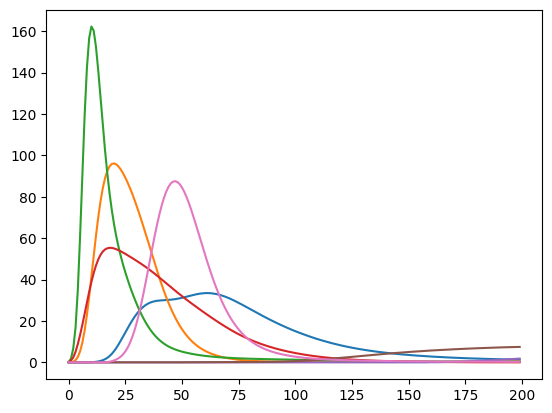

In [8]:
selected_layers = [51, 71, 42, 20, 12, 2, 82]

if __name__ == '__main__':

  for i in range(7):

     outflow = Checkpoint3_solution(selected_layers[i], [120, 250] )
     #plt.plot(np.arange(200),outflow)